### Carga de Librerías

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import modulos as mod
import preprocessors as pp
from sklearn.preprocessing import StandardScaler

### Carga de Dataset

In [2]:
data = pd.read_csv('Grades.csv', sep = ",", encoding='latin-1')
dataset = data

In [3]:
#dataset = dataset.drop(['G1','G2'], axis=1)

In [4]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### La data no contiene ningún faltante

### Variables Numéricas

In [7]:
mod.getNumColNames(dataset)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

#### Variables Categóricas

In [8]:
mod.getCatColNames(dataset)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

### Variables Numéricas con Faltantes

In [9]:
cols_num_con_nan = mod.getNumNanColNames(dataset)
cols_num_con_nan

[]

#### No hay columnas numéricas con faltantes

### Imputación de Columnas Numéricas que contienen Nan

In [10]:
for col in cols_num_con_nan:
    pp.imputVN(dataset, col ,"Quantity")

### Columnas Categóricas con Nan menor a 5%

In [11]:
cols_cca = mod.getNanGoodColsNames(dataset, 0.05)
cols_cca

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

### Aplicación de CCA para columnas Categoricas con Nan 

In [12]:
dataset_temp = dataset[cols_cca].dropna()

In [13]:
dataset_temp.shape, dataset.shape

((649, 33), (649, 33))

In [14]:
dataset_vn = dataset_temp

### Determinación de columnas categoricas con NaN mayor a 5%

In [15]:
cols_cat_con_nan = mod.getCatNanColNames(dataset_vn)
cols_cat_con_nan

[]

#### No hay variables categoricas con nan

### Función Imputación de Variables Categóricas con Missings

In [16]:
for col in cols_cat_con_nan:
    pp.ImpVC(dataset_vn)

In [17]:
dataset_vc = dataset_vn
dataset_vc

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Codificación Variables Categóricas

In [18]:
cat_cols = mod.getCategoryVars(dataset_vc)
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

#### Imputación por Frequency Encoding

In [19]:
for col in cat_cols:
    pp.executeFreqEncoding(dataset_vc, map_type='freq')

In [20]:
dataset_cvc = dataset_vc
dataset_cvc

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,423.0,383.0,18,452.0,457.0,80.0,4,4,135.0,36.0,...,4,3,4,1,1,3,4,0,11,11
1,423.0,383.0,17,452.0,457.0,569.0,1,1,135.0,367.0,...,5,3,3,1,1,3,2,9,11,11
2,423.0,383.0,15,452.0,192.0,569.0,1,1,135.0,367.0,...,4,3,2,2,3,3,6,12,13,12
3,423.0,383.0,15,452.0,457.0,569.0,4,2,48.0,181.0,...,3,2,2,1,1,5,0,14,14,14
4,423.0,383.0,16,452.0,457.0,569.0,3,3,258.0,367.0,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,226.0,383.0,19,197.0,457.0,569.0,2,3,136.0,367.0,...,5,4,2,1,2,5,4,10,11,10
645,226.0,383.0,18,452.0,192.0,569.0,3,1,72.0,181.0,...,4,3,4,1,1,1,4,15,15,16
646,226.0,383.0,18,452.0,457.0,569.0,1,1,258.0,367.0,...,1,1,1,1,1,5,6,11,12,9
647,226.0,266.0,17,452.0,192.0,569.0,3,1,136.0,181.0,...,2,4,5,3,4,2,6,10,10,10


In [1]:
#dataset_cvc.dtypes

### Transformación de Variables Numéricas

In [22]:
numeric_cont_vars = mod.getContinuesCols(dataset_cvc)
numeric_cont_vars.pop()
numeric_cont_vars

['absences', 'G1', 'G2']

### Graficación de las variables para transformación

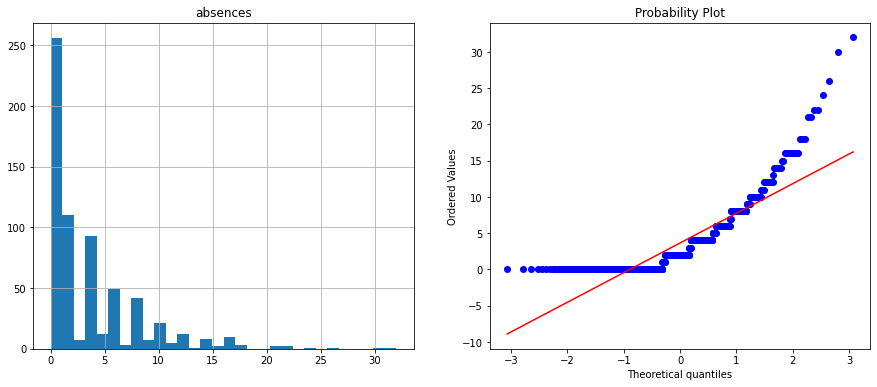

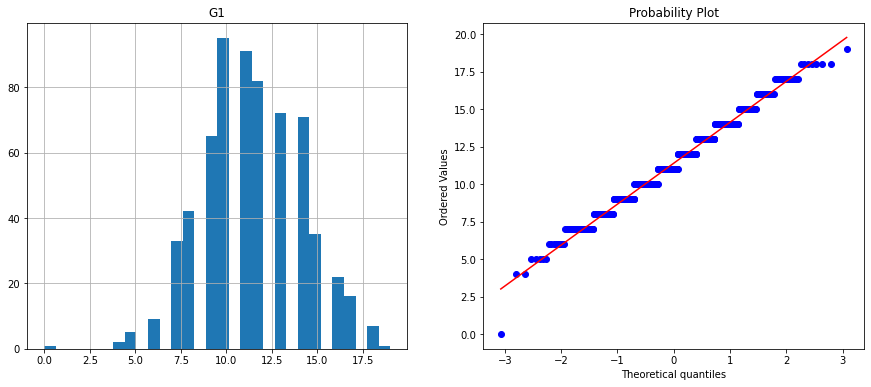

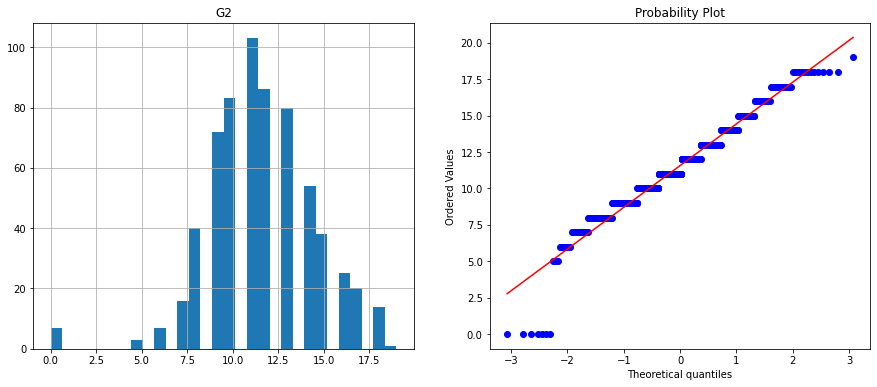

In [23]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_cvc, col)

### Función de Transformación de Variables

In [24]:
for col in numeric_cont_vars:
        pp.transfvnum(dataset_cvc, col,"G3")

No se hace transformación a la columna absences porque no mejoró
Transformación de la columna G1 con Box Cox
No se hace transformación a la columna G2 porque no mejoró


In [25]:
dataset_tvn = dataset_cvc

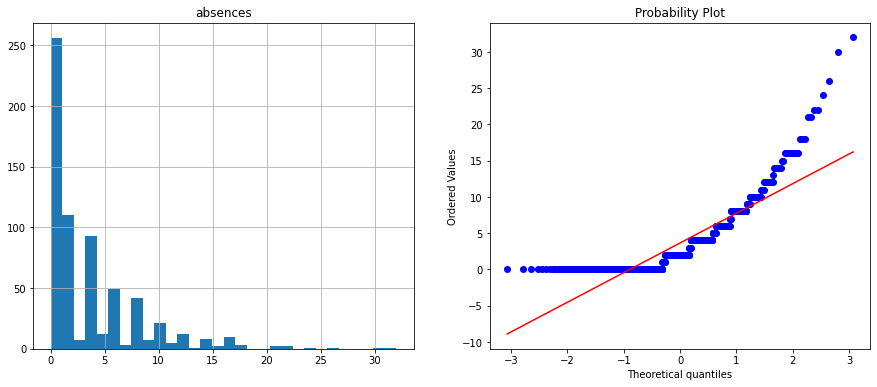

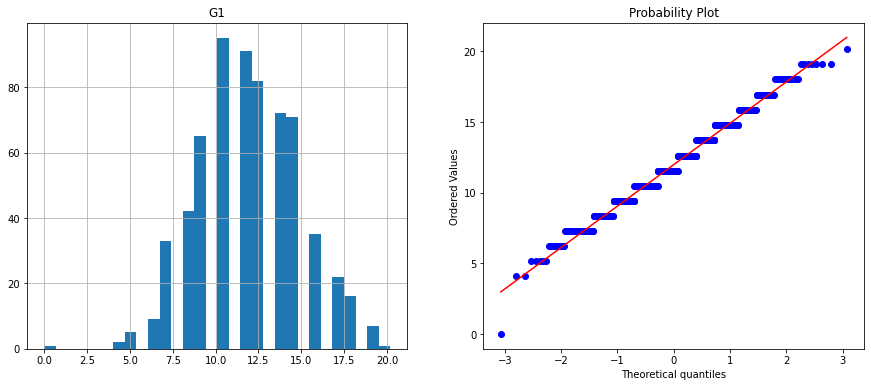

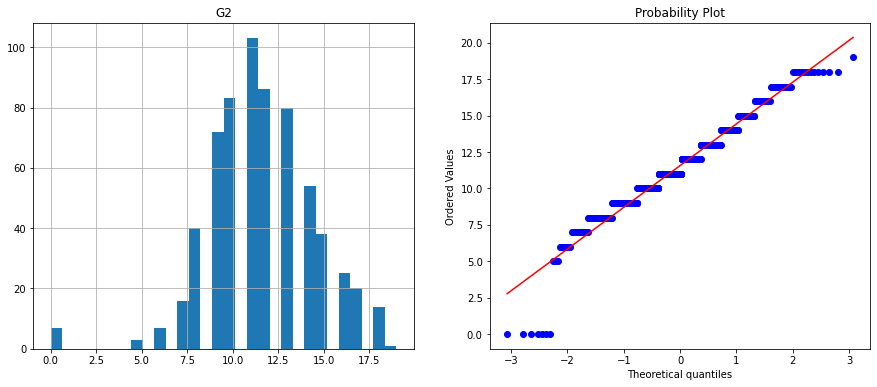

In [26]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_tvn, col)

In [27]:
dataset_tvn

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,423.0,383.0,18,452.0,457.0,80.0,4,4,135.0,36.0,...,4,3,4,1,1,3,4,0.000000,11,11
1,423.0,383.0,17,452.0,457.0,569.0,1,1,135.0,367.0,...,5,3,3,1,1,3,2,9.401925,11,11
2,423.0,383.0,15,452.0,192.0,569.0,1,1,135.0,367.0,...,4,3,2,2,3,3,6,12.613607,13,12
3,423.0,383.0,15,452.0,457.0,569.0,4,2,48.0,181.0,...,3,2,2,1,1,5,0,14.766648,14,14
4,423.0,383.0,16,452.0,457.0,569.0,3,3,258.0,367.0,...,4,3,2,1,2,5,0,11.540473,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,226.0,383.0,19,197.0,457.0,569.0,2,3,136.0,367.0,...,5,4,2,1,2,5,4,10.469839,11,10
645,226.0,383.0,18,452.0,192.0,569.0,3,1,72.0,181.0,...,4,3,4,1,1,1,4,15.846256,15,16
646,226.0,383.0,18,452.0,457.0,569.0,1,1,258.0,367.0,...,1,1,1,1,1,5,6,11.540473,12,9
647,226.0,266.0,17,452.0,192.0,569.0,3,1,136.0,181.0,...,2,4,5,3,4,2,6,10.469839,10,10


### Outliers

In [28]:
numeric_cont_vars


['absences', 'G1', 'G2']

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


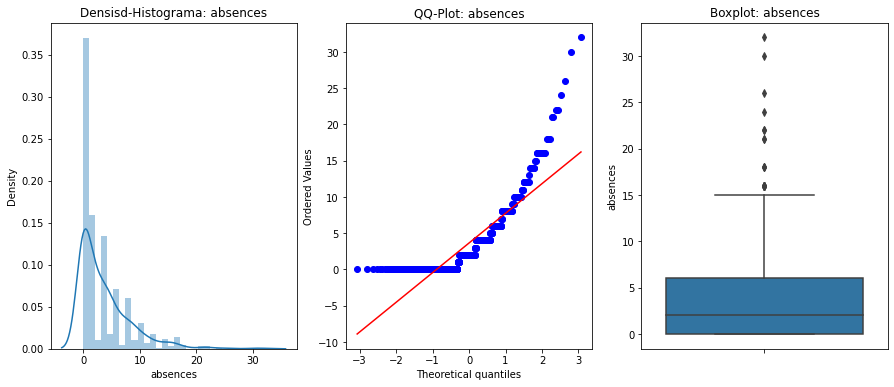

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


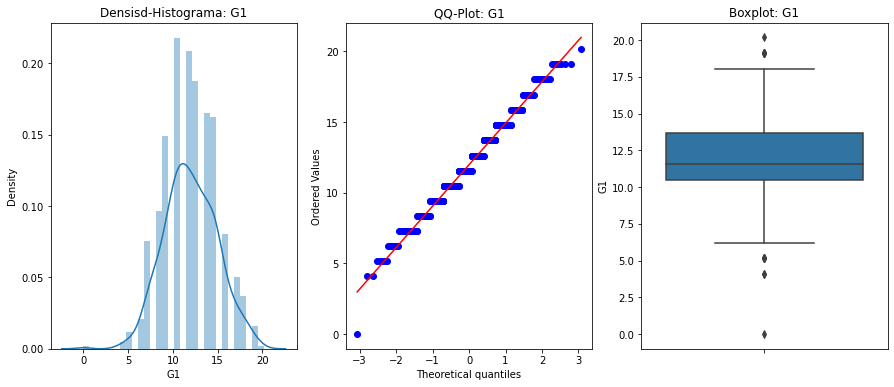

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


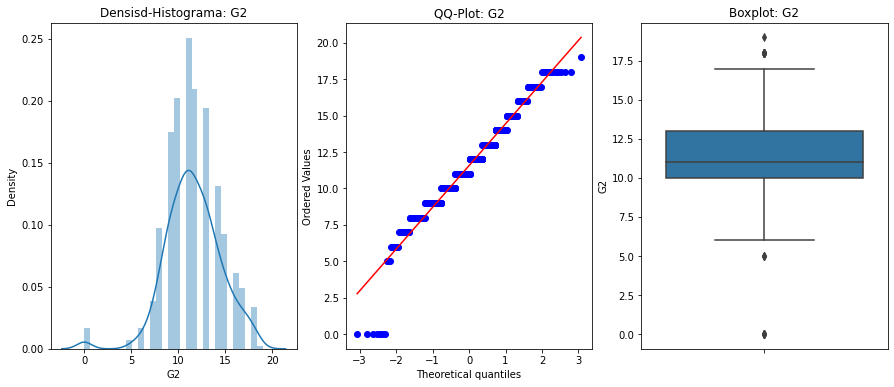

In [29]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_tvn, col)

In [30]:
#numeric_cont_vars.pop(18)
numeric_cont_vars

['absences', 'G1', 'G2']

In [31]:
for col in numeric_cont_vars:
    mod.detect_outliers(dataset_tvn, col, 1.75)

In [32]:
for col in numeric_cont_vars:
    pp.outlier_treatment(dataset_tvn, col, 1.75)

In [33]:
dataset_sca = dataset_tvn

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


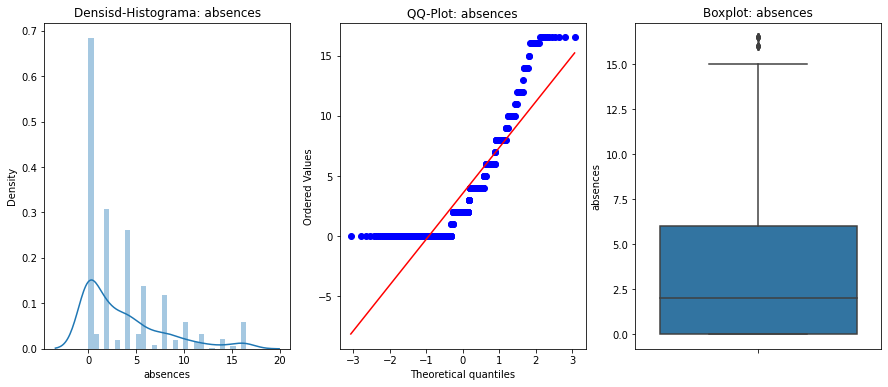

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


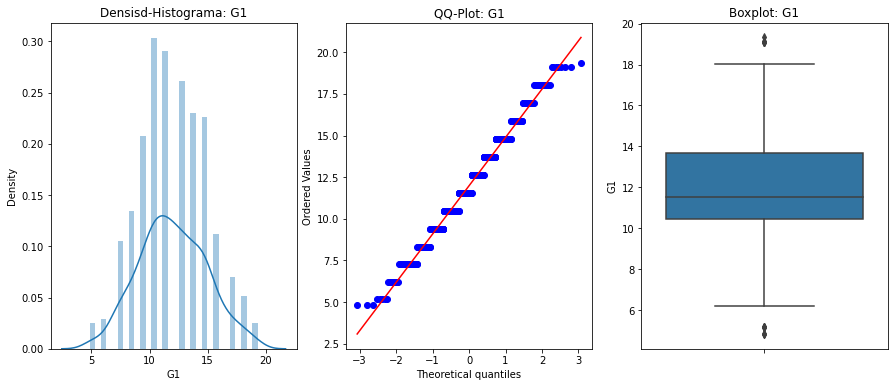

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


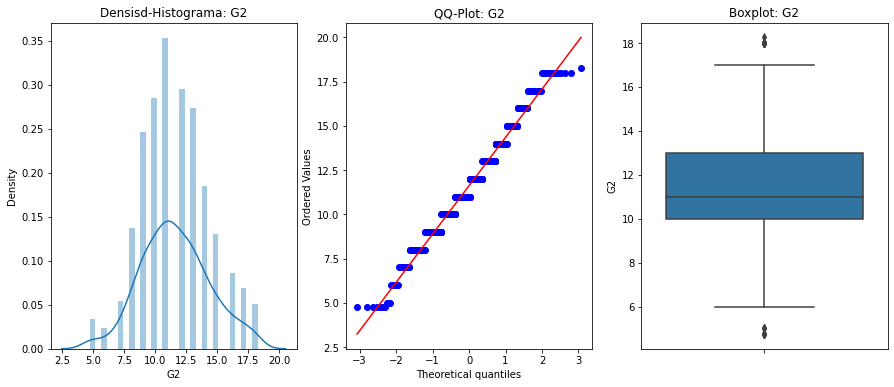

In [34]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_sca, col)

### Featuring Scaling

In [35]:
shape = dataset_sca.shape
dataset_sca[dataset_sca.columns[1:(shape[1])]]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,383.0,18,452.0,457.0,80.0,4,4,135.0,36.0,285.0,...,4,3,4,1,1,3,4.0,4.836216,11.0,11
1,383.0,17,452.0,457.0,569.0,1,1,135.0,367.0,285.0,...,5,3,3,1,1,3,2.0,9.401925,11.0,11
2,383.0,15,452.0,192.0,569.0,1,1,135.0,367.0,72.0,...,4,3,2,2,3,3,6.0,12.613607,13.0,12
3,383.0,15,452.0,457.0,569.0,4,2,48.0,181.0,149.0,...,3,2,2,1,1,5,0.0,14.766648,14.0,14
4,383.0,16,452.0,457.0,569.0,3,3,258.0,367.0,149.0,...,4,3,2,1,2,5,0.0,11.540473,13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,383.0,19,197.0,457.0,569.0,2,3,136.0,367.0,285.0,...,5,4,2,1,2,5,4.0,10.469839,11.0,10
645,383.0,18,452.0,192.0,569.0,3,1,72.0,181.0,285.0,...,4,3,4,1,1,1,4.0,15.846256,15.0,16
646,383.0,18,452.0,457.0,569.0,1,1,258.0,367.0,285.0,...,1,1,1,1,1,5,6.0,11.540473,12.0,9
647,266.0,17,452.0,192.0,569.0,3,1,136.0,181.0,285.0,...,2,4,5,3,4,2,6.0,10.469839,10.0,10


In [36]:
scaler = StandardScaler()
scaler.fit(dataset_sca)

StandardScaler()

In [37]:
dataset_final = pd.DataFrame(scaler.transform(dataset_sca), columns=dataset_sca.columns)
#dataset_final = dataset_sca

In [38]:
np.round(dataset_final.describe(), 2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,...,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.37,-1.20,-1.43,-1.51,-1.54,-2.67,-2.22,-2.10,-1.62,-1.90,...,-3.07,-2.08,-1.86,-0.54,-1.00,-1.75,-0.84,-2.46,-2.51,-3.69
25%,-1.37,-1.20,-0.61,-1.51,-1.54,0.37,-0.45,-1.19,-0.47,-0.65,...,0.07,-0.17,-1.01,-0.54,-1.00,-1.06,-0.84,-0.52,-0.59,-0.59
50%,0.73,0.83,0.21,0.66,0.65,0.37,-0.45,-0.28,-0.46,0.82,...,0.07,-0.17,-0.16,-0.54,-0.22,0.32,-0.37,-0.15,-0.23,0.03
75%,0.73,0.83,1.03,0.66,0.65,0.37,1.31,0.63,1.15,0.82,...,1.12,0.78,0.69,0.54,0.56,1.01,0.58,0.59,0.50,0.65
max,0.73,0.83,4.32,0.66,0.65,0.37,1.31,1.54,1.15,0.82,...,1.12,1.73,1.54,3.78,2.12,1.01,3.08,2.52,2.42,2.20


### Data Set Final

In [39]:
dataset_final['G3'] = dataset['G3']

In [40]:
dataset_final.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.730944,0.833377,1.031695,0.660182,0.648175,-2.666927,1.310216,1.540715,-0.470921,-1.795986,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.106883,-2.459457,-0.226230,11
1,0.730944,0.833377,0.210137,0.660182,0.648175,0.374963,-1.336039,-1.188832,-0.470921,0.816589,...,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.369049,-0.888936,-0.226230,11
2,0.730944,0.833377,-1.432980,0.660182,-1.542792,0.374963,-1.336039,-1.188832,-0.470921,0.816589,...,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.582814,0.215824,0.503327,12
3,0.730944,0.833377,-1.432980,0.660182,0.648175,0.374963,1.310216,-0.278983,-1.619103,-0.651505,...,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.844980,0.956432,0.868105,14
4,0.730944,0.833377,-0.611422,0.660182,0.648175,0.374963,0.428131,0.630866,1.152371,0.816589,...,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.844980,-0.153314,0.503327,13


In [41]:
pp.dfcorr(dataset_final, "G3" )

,Columna,Correlación
0,school,0.284294
1,sex,0.129077
2,age,0.106505
3,address,0.167637
4,famsize,0.045016
5,Pstatus,0.000754
6,Medu,0.240151
7,Fedu,0.211800
8,Mjob,0.112514
9,Fjob,0.035368


In [42]:
#dataset_final = dataset_final.drop(['Invoice ID', 'City', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income'], axis=1)
#dataset_final = dataset_final.drop(['Name','Ticket'], axis=1)


In [43]:
#dataset_final

### Conversión del dataframe a csv

In [44]:
dataset_final.to_csv("DataTratadaGradesF.csv")

### Correlación de las Variables

In [46]:
dataset_final.corr().to_csv("correlaciones.csv", encoding = 'UTF8')